# EDA: Titanic Dataset
**Author:** Repalle Susmitha  
**Dataset:** train.csv (Titanic)  
**Objective:** Explore data, visualize patterns, and write observations.


In [1]:
# Cell 2: Imports and load dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Make plots appear in the notebook
%matplotlib inline
sns.set(style="whitegrid")

# Load the train dataset (adjust path if needed)
data_path = r"C:\Users\susmi\Downloads\titanic\train.csv"
df = pd.read_csv(data_path)

# Quick confirmation
print("Rows, Columns:", df.shape)
df.head()


Rows, Columns: (891, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [2]:
# Cell 3: Basic info
df.info()
print("\nMissing values per column:")
print(df.isnull().sum())
display(df.describe(include='all').T)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB

Missing values per column:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarke

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
PassengerId,891.0,NaN,NaN,NaN,446.0,257.353842,1.0,223.5,446.0,668.5,891.0
Survived,891.0,NaN,NaN,NaN,0.383838,0.486592,0.0,0.0,0.0,1.0,1.0
Pclass,891.0,NaN,NaN,NaN,2.308642,0.836071,1.0,2.0,3.0,3.0,3.0
Name,891,891,"Braund, Mr. Owen Harris",1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Sex,891,2,male,577,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,714.0,NaN,NaN,NaN,29.699118,14.526497,0.42,20.125,28.0,38.0,80.0
SibSp,891.0,NaN,NaN,NaN,0.523008,1.102743,0.0,0.0,0.0,1.0,8.0
Parch,891.0,NaN,NaN,NaN,0.381594,0.806057,0.0,0.0,0.0,0.0,6.0
Ticket,891,681,347082,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Fare,891.0,NaN,NaN,NaN,32.204208,49.693429,0.0,7.9104,14.4542,31.0,512.3292


In [3]:
# Cell 4: Simple cleaning
df2 = df.copy()

# Fill Embarked with the most common port
df2['Embarked'].fillna(df2['Embarked'].mode()[0], inplace=True)

# Fill Age with median (simple approach)
df2['Age'].fillna(df2['Age'].median(), inplace=True)

# Cabin is very sparse — create "Has_Cabin" flag instead
df2['Has_Cabin'] = df2['Cabin'].notna().astype(int)

# Verify
df2.isnull().sum()


C:\Users\susmi\AppData\Local\Temp\ipykernel_23452\433133841.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df2['Embarked'].fillna(df2['Embarked'].mode()[0], inplace=True)
C:\Users\susmi\AppData\Local\Temp\ipykernel_23452\433133841.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a c

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
Has_Cabin        0
dtype: int64

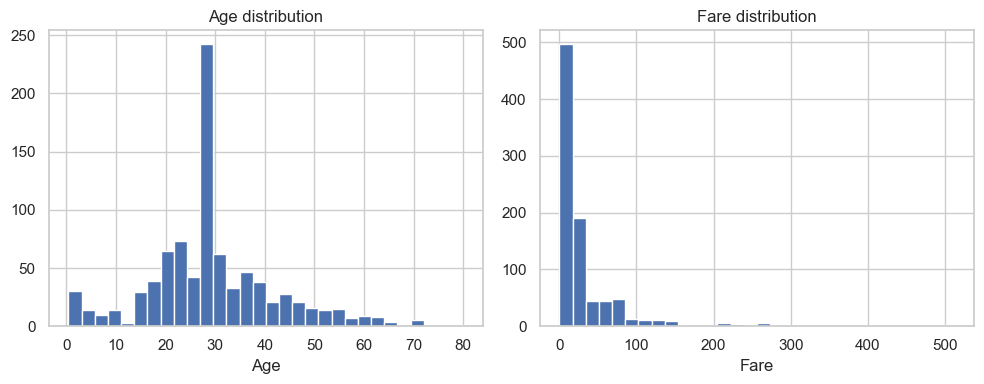

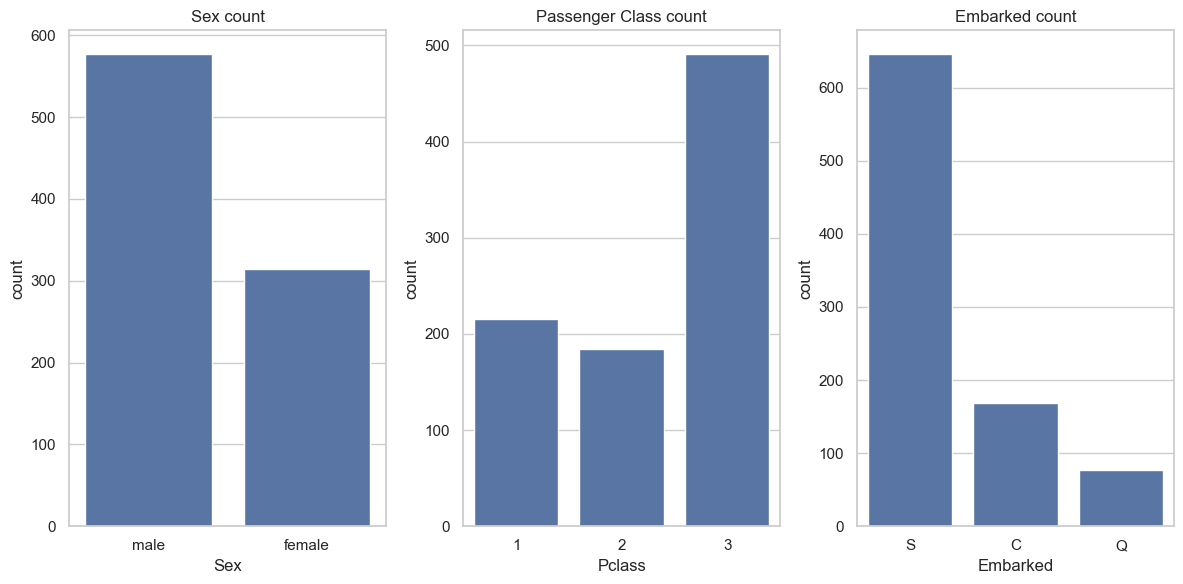

In [4]:
# Cell 5: Univariate analysis
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
df2['Age'].hist(bins=30)
plt.title('Age distribution')
plt.xlabel('Age')

plt.subplot(1,2,2)
df2['Fare'].hist(bins=30)
plt.title('Fare distribution')
plt.xlabel('Fare')
plt.tight_layout()
plt.show()

# Countplots for categorical vars
plt.figure(figsize=(12,6))
plt.subplot(1,3,1)
sns.countplot(x='Sex', data=df2)
plt.title('Sex count')

plt.subplot(1,3,2)
sns.countplot(x='Pclass', data=df2)
plt.title('Passenger Class count')

plt.subplot(1,3,3)
sns.countplot(x='Embarked', data=df2)
plt.title('Embarked count')
plt.tight_layout()
plt.show()


Overall survival rate:
0.3838383838383838

Survival by sex:
 Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64

Survival by Pclass:
 Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64


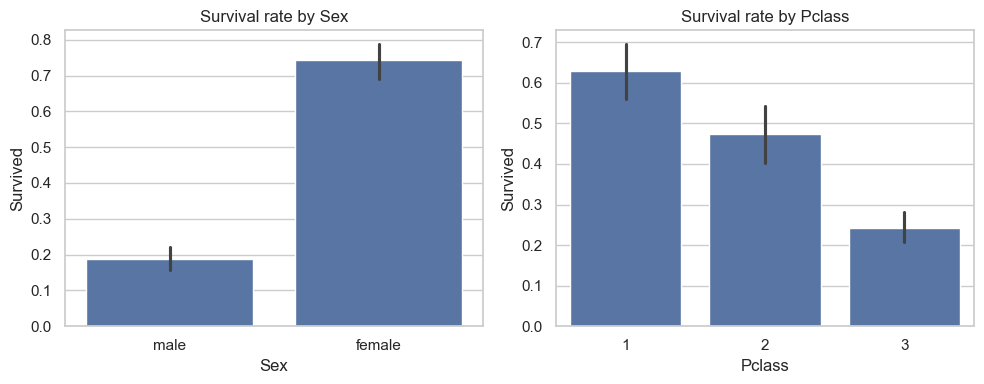

In [5]:
# Cell 6: Survival analysis
print("Overall survival rate:")
print(df2['Survived'].mean())

# Survival by sex and class
survival_by_sex = df2.groupby('Sex')['Survived'].mean()
survival_by_pclass = df2.groupby('Pclass')['Survived'].mean()
print("\nSurvival by sex:\n", survival_by_sex)
print("\nSurvival by Pclass:\n", survival_by_pclass)

# Plot survival by sex and class
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
sns.barplot(x='Sex', y='Survived', data=df2)
plt.title('Survival rate by Sex')

plt.subplot(1,2,2)
sns.barplot(x='Pclass', y='Survived', data=df2)
plt.title('Survival rate by Pclass')
plt.tight_layout()
plt.show()


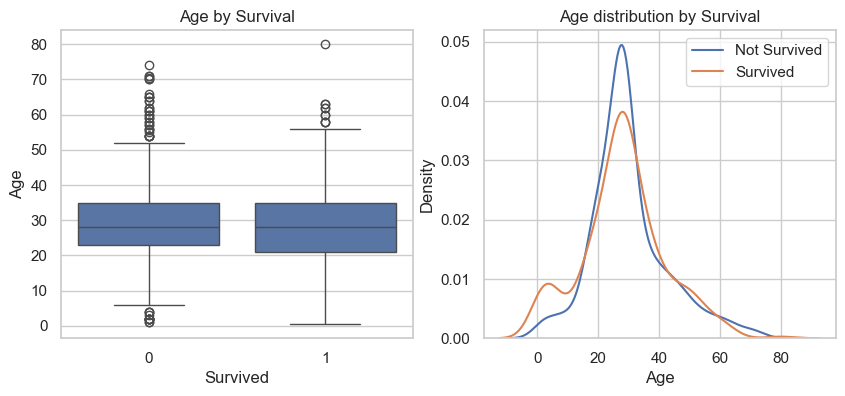

In [6]:
# Cell 7: Age vs survival (boxplot + KDE)
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
sns.boxplot(x='Survived', y='Age', data=df2)
plt.title('Age by Survival')

plt.subplot(1,2,2)
sns.kdeplot(df2[df2['Survived']==0]['Age'], label='Not Survived')
sns.kdeplot(df2[df2['Survived']==1]['Age'], label='Survived')
plt.legend()
plt.title('Age distribution by Survival')
plt.show()


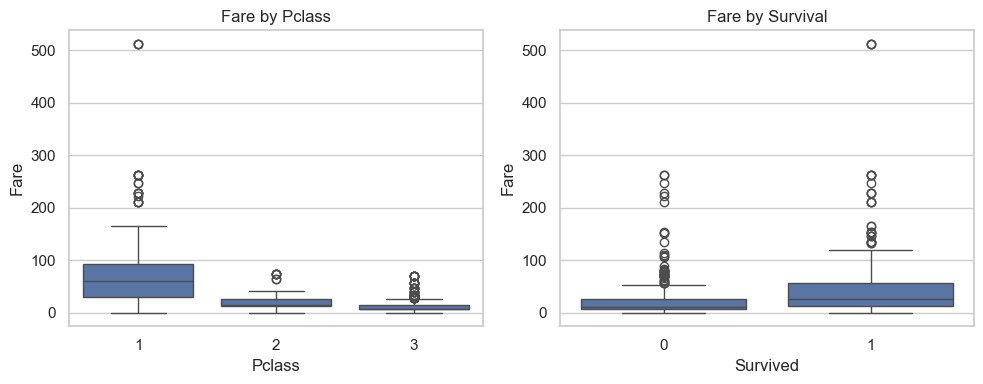

In [7]:
# Cell 8: Fare by Pclass and survival
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
sns.boxplot(x='Pclass', y='Fare', data=df2)
plt.title('Fare by Pclass')

plt.subplot(1,2,2)
sns.boxplot(x='Survived', y='Fare', data=df2)
plt.title('Fare by Survival')
plt.tight_layout()
plt.show()


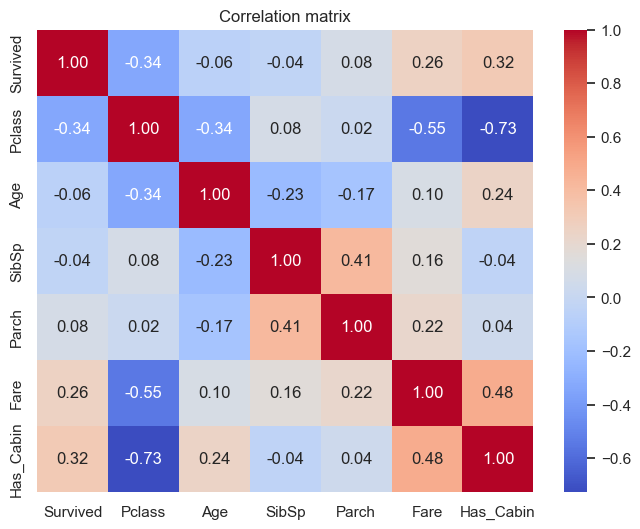

In [8]:
# Cell 9: Correlation heatmap
num_cols = ['Survived','Pclass','Age','SibSp','Parch','Fare','Has_Cabin']
corr = df2[num_cols].corr()
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation matrix')
plt.show()


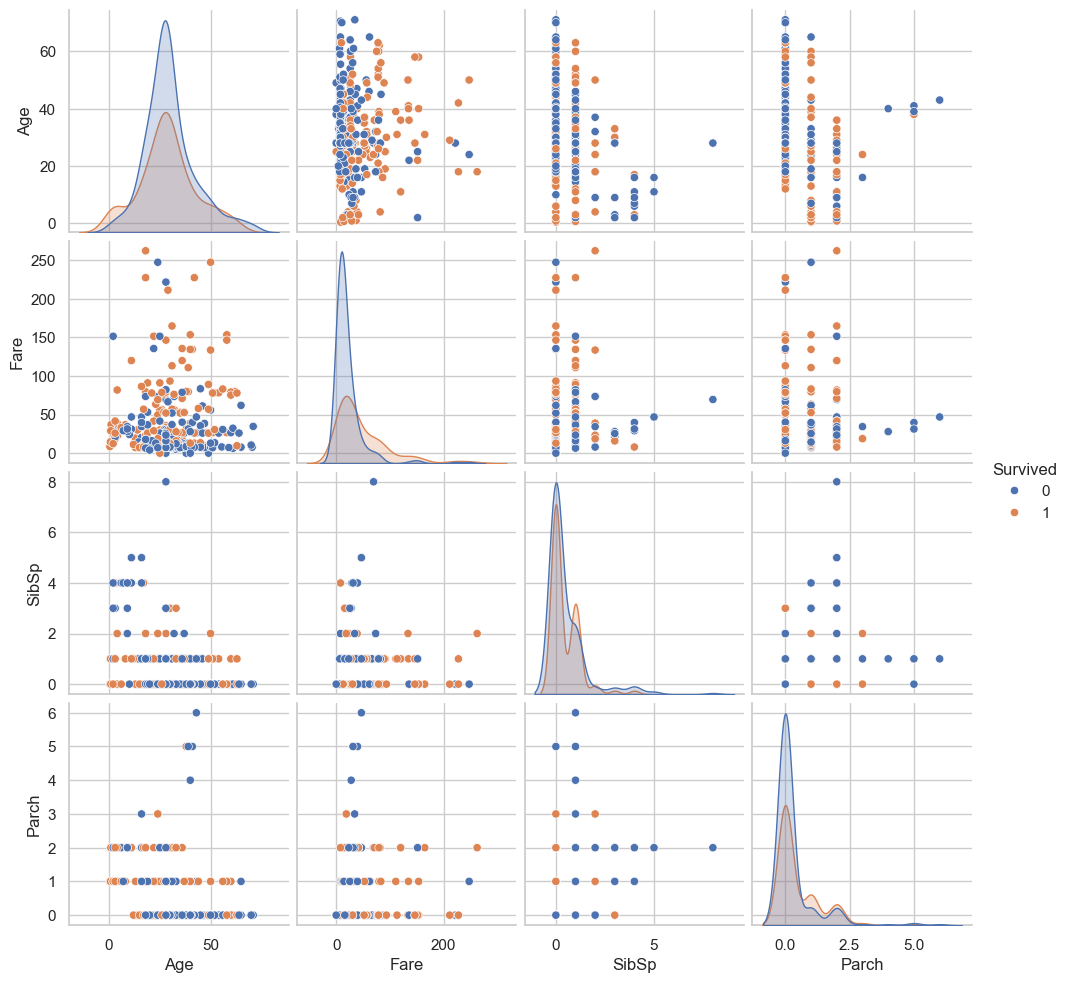

In [9]:
# Cell 10: Pairplot (sample or subset to speed up)
sns.pairplot(df2[['Age','Fare','SibSp','Parch','Survived']].sample(400), hue='Survived', diag_kind='kde')
plt.show()


In [10]:
# Cell 11: Feature engineering
df2['FamilySize'] = df2['SibSp'] + df2['Parch'] + 1
df2['IsAlone'] = (df2['FamilySize'] == 1).astype(int)

# Extract Title from Name
df2['Title'] = df2['Name'].str.extract(r',\s*([^\.]+)\.', expand=False).str.strip()
# Group rare titles
titles_to_replace = ['Lady','Countess','Capt','Col','Don','Dr','Major','Rev','Sir','Jonkheer','Dona']
df2['Title'] = df2['Title'].replace(titles_to_replace, 'Rare')
df2['Title'] = df2['Title'].replace({'Mlle':'Miss','Ms':'Miss','Mme':'Mrs'})

df2[['Name','Title','FamilySize','IsAlone']].head()


,Name,Title,FamilySize,IsAlone
0,"Braund, Mr. Owen Harris",Mr,2,0
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",Mrs,2,0
2,"Heikkinen, Miss. Laina",Miss,1,1
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",Mrs,2,0
4,"Allen, Mr. William Henry",Mr,1,1


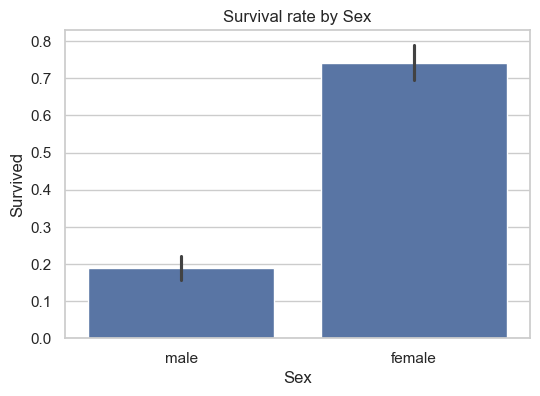

Saved: survival_by_sex.png


In [11]:
# Cell 12: Example saving a plot
plt.figure(figsize=(6,4))
sns.barplot(x='Sex', y='Survived', data=df2)
plt.title('Survival rate by Sex')
plt.savefig('survival_by_sex.png', bbox_inches='tight')
plt.show()
print("Saved: survival_by_sex.png")


In [12]:
# Calculate key stats for summary
overall_survival_rate = df2['Survived'].mean() * 100

survival_by_sex = df2.groupby('Sex')['Survived'].mean() * 100
survival_by_class = df2.groupby('Pclass')['Survived'].mean() * 100

median_age = df2['Age'].median()
avg_fare_survivors = df2[df2['Survived'] == 1]['Fare'].mean()
avg_fare_non_survivors = df2[df2['Survived'] == 0]['Fare'].mean()

print(f"Overall survival rate: {overall_survival_rate:.2f}%\n")
print("Survival rate by sex:")
print(survival_by_sex)
print("\nSurvival rate by passenger class:")
print(survival_by_class)
print(f"\nMedian Age: {median_age}")
print(f"Average fare (survivors): {avg_fare_survivors:.2f}")
print(f"Average fare (non-survivors): {avg_fare_non_survivors:.2f}")



Overall survival rate: 38.38%

Survival rate by sex:
Sex
female    74.203822
male      18.890815
Name: Survived, dtype: float64

Survival rate by passenger class:
Pclass
1    62.962963
2    47.282609
3    24.236253
Name: Survived, dtype: float64

Median Age: 28.0
Average fare (survivors): 48.40
Average fare (non-survivors): 22.12


## Observations & Summary

- **Overall survival rate:** 38.38%
- **By Sex:**
  - Female: 74.20%
  - Male: 18.89%
- **By Passenger Class:**
  - 1st Class: 62.96%
  - 2nd Class: 47.28%
  - 3rd Class: 24.24%
- **Age:**
  - Median age of passengers: 28 years
  - Children (under 15) had higher survival rates compared to adults.
- **Fare:**
  - Average fare (survivors): 48.40
  - Average fare (non-survivors): 22.12
- **Cabin Info:**
  - Passengers with recorded cabin numbers had higher survival rates than those without.
- **Key Insights:**
  - Survival was strongly associated with being female, being in higher passenger classes, and paying higher fares.
  - Age had a weaker but noticeable trend — younger passengers were more likely to survive.
